In [1]:
from ef.config.config import Config
from ef.config.visualizer import Visualizer3d
conf = Config.from_fname('conducting_sphere_potential.conf')
conf.visualize_all(Visualizer3d())


No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

In [2]:
sim = conf.make()
sim._output_format = 'python'
sim.start_pic_simulation()

Writing initial fields to file
Writing to file ./conducting_sphere_potential_fieldsWithoutParticles.h5
Writing step 0 to file
Writing to file ./conducting_sphere_potential_0000000.h5
Time step from 0 to 1 of 10
Time step from 1 to 2 of 10
Time step from 2 to 3 of 10
Time step from 3 to 4 of 10
Time step from 4 to 5 of 10
Time step from 5 to 6 of 10
Time step from 6 to 7 of 10
Time step from 7 to 8 of 10
Time step from 8 to 9 of 10
Time step from 9 to 10 of 10
Writing step 10 to file
Writing to file ./conducting_sphere_potential_0000010.h5


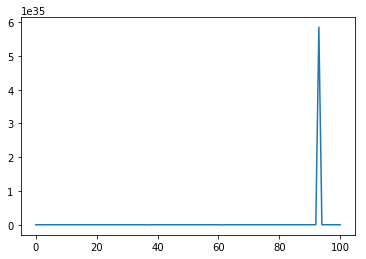

In [3]:
from matplotlib import pyplot as plt
c = sim.inner_regions[0].shape.origin

plt.plot(sim.spat_mesh.potential[50, 50])


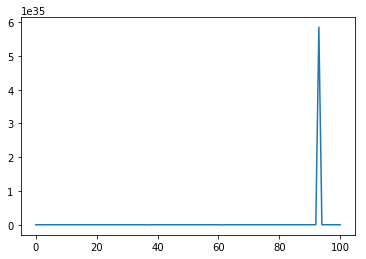

In [4]:
import h5py
outfile_name = "conducting_sphere_potential_fieldsWithoutParticles.h5"
with h5py.File(outfile_name, "r") as outfile:
    plt.plot(outfile['spat_mesh/potential'][50, 50])


In [5]:
import h5py
outfile_name = "conducting_sphere_potential_fieldsWithoutParticles.h5"
with h5py.File(outfile_name, "r") as outfile:
    data = outfile['spat_mesh/potential'][()]

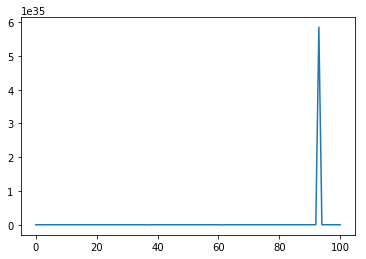

In [6]:
plt.plot(data[50, 50])

In [7]:
conf.make().start_pic_simulation()

Writing initial fields to file
Writing to file ./conducting_sphere_potential_fieldsWithoutParticles.h5
Writing step 0 to file
Writing to file ./conducting_sphere_potential_0000000.h5
Time step from 0 to 1 of 10
Time step from 1 to 2 of 10
Time step from 2 to 3 of 10
Time step from 3 to 4 of 10
Time step from 4 to 5 of 10
Time step from 5 to 6 of 10
Time step from 6 to 7 of 10
Time step from 7 to 8 of 10
Time step from 8 to 9 of 10
Time step from 9 to 10 of 10
Writing step 10 to file
Writing to file ./conducting_sphere_potential_0000010.h5


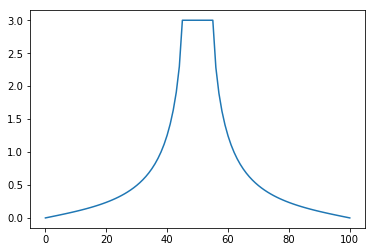

In [8]:
import h5py
outfile_name = "conducting_sphere_potential_fieldsWithoutParticles.h5"
with h5py.File(outfile_name, "r") as outfile:
    data = outfile['SpatialMesh/potential'][()].reshape((101, 101, 101))
plt.plot(data[50, 50])

Saving potential comparison to 'potential_in_plane.png'
Saving potential comparison to 'potential_along_z.png'


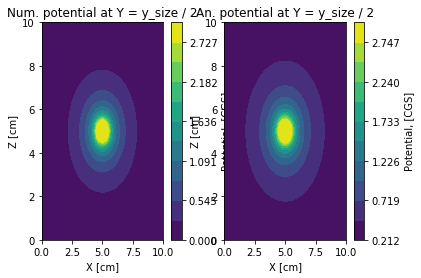

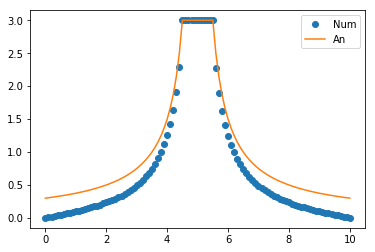

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


def main():
    outfile_name = "conducting_sphere_potential_fieldsWithoutParticles.h5"
    extract_sphere_properties_from_out_file( outfile_name )
    node_x, node_y, node_z, phi = extract_full_nodecoords_and_potential_from_out_file( outfile_name )
    plot_potential_in_plane( node_x, node_y, node_z, phi )
    plot_potential_along_z( node_x, node_y, node_z, phi )

    
def extract_sphere_properties_from_out_file( outfile_name ):
    outfile = h5py.File( outfile_name, mode="r")
    sphere_hdf5_group = outfile['/InnerRegions/sphere']
    global sphere_center_x, sphere_center_y, sphere_center_z
    global sphere_radius, sphere_phi
    sphere_center_x = sphere_hdf5_group.attrs['origin_x']
    sphere_center_y = sphere_hdf5_group.attrs['origin_y']
    sphere_center_z = sphere_hdf5_group.attrs['origin_z']
    sphere_radius = sphere_hdf5_group.attrs['radius']
    sphere_phi = sphere_hdf5_group.attrs['potential']
    outfile.close()

    
def extract_full_nodecoords_and_potential_from_out_file( outfile_name ):
    outfile = h5py.File( outfile_name, driver="core", mode="r" )
    node_coords_x_hdf5 = outfile['/SpatialMesh/node_coordinates_x']
    node_coords_y_hdf5 = outfile['/SpatialMesh/node_coordinates_y']
    node_coords_z_hdf5 = outfile['/SpatialMesh/node_coordinates_z']
    num_potential_hdf5 = outfile['/SpatialMesh/potential']
    node_coords_x = np.empty_like( node_coords_x_hdf5 )
    node_coords_y = np.empty_like( node_coords_y_hdf5 )
    node_coords_z = np.empty_like( node_coords_z_hdf5 )
    node_coords_x_hdf5.read_direct( node_coords_x )
    node_coords_y_hdf5.read_direct( node_coords_y )
    node_coords_z_hdf5.read_direct( node_coords_z )
    num_potential = np.empty_like( num_potential_hdf5 )
    num_potential_hdf5.read_direct( num_potential )
    outfile.close()
    return( node_coords_x, node_coords_y, node_coords_z, num_potential )


def plot_potential_in_plane( node_x, node_y, node_z, phi ):
    num_subset = num_subset_in_middle_plane( node_x, node_y, node_z, phi )
    an = an_potential_at_num_points( num_subset )
    plot_num_potential_on_plane( num_subset, an )

    
def plot_potential_along_z( node_x, node_y, node_z, phi ):
    num_subset = num_subset_along_z( node_x, node_y, node_z, phi )
    an = an_potential_at_num_points( num_subset )
    plot_comparision( num_subset, an )


def num_subset_in_middle_plane( node_x, node_y, node_z, phi ):    
    num_subset = []
    for ( x, y, z, p ) in zip( node_x, node_y, node_z, phi ):
        if y == sphere_center_y:
            num_subset.append( (x, y, z, p) )            
    num_subset = np.array( num_subset,
                           dtype=[('x', 'float'), ('y', 'float'),
                                  ('z', 'float'), ('phi', 'float')] )
    return( num_subset )


    
def num_subset_along_z( node_x, node_y, node_z, phi ):
    num_subset = []
    for ( x, y, z, p ) in zip( node_x, node_y, node_z, phi ):
        if ( x == sphere_center_x and y == sphere_center_y ):
            num_subset.append( (x, y, z, p) )
    num_subset = np.array( num_subset,
                           dtype=[('x', 'float'), ('y', 'float'),
                                  ('z', 'float'), ('phi', 'float')] )
    return( num_subset )
    

def an_potential_at_num_points( num_subset ):
    an = np.empty_like( num_subset )
    for ( i, (x, y, z) ) in enumerate( num_subset[['x','y','z']] ):
        phi = spherical_potential( x, y, z,
                                   sphere_center_x, sphere_center_y, sphere_center_z,
                                   sphere_radius, sphere_phi )
        an[i] = ( x, y, z, phi )
    return an


def spherical_potential( x, y, z,
                         center_x, center_y, center_z,
                         radius, phi_on_sphere ):
    dist = np.sqrt( (x - center_x) * (x - center_x) +
                    (y - center_y) * (y - center_y) +
                    (z - center_z) * (z - center_z) )
    if dist <= radius:
        potential = phi_on_sphere
    else:
        potential = phi_on_sphere * radius / dist
    return( potential )


def plot_num_potential_on_plane( num, an ):
    # todo: sort num before reshaping
    # todo: get size from out-file
    # num
    plt.figure()
    plt.subplot(121)
    X = num['x'].reshape( ( 101,101 ) ) # 41 node with varying X and fixed Z, then next X-row with different Z. 
    Y = num['z'].reshape( ( 101,101 ) )
    Z = num['phi'].reshape( ( 101,101 ) )
    levels = np.linspace( Z.min(), Z.max(), 12 )
    CS = plt.contourf( X, Y, Z, levels )
    cbar = plt.colorbar(CS)
    cbar.ax.set_ylabel('Potential, [CGS]')
    plt.xlabel( "X [cm]" )
    plt.ylabel( "Z [cm]" )
    plt.title('Num. potential at Y = y_size / 2')
    # an
    plt.subplot(122)
    X = an['x'].reshape( ( 101,101 ) ) # 41 node with varying X and fixed Z, then next X-row with different Z. 
    Y = an['z'].reshape( ( 101,101 ) )
    Z = an['phi'].reshape( ( 101,101 ) )
    levels = np.linspace( Z.min(), Z.max(), 12 )
    CS = plt.contourf( X, Y, Z, levels )
    cbar = plt.colorbar(CS)
    cbar.ax.set_ylabel('Potential, [CGS]')
    plt.xlabel( "X [cm]" )
    plt.ylabel( "Z [cm]" )
    plt.title('An. potential at Y = y_size / 2')
    #plt.show()    
    print( "Saving potential comparison to 'potential_in_plane.png'")
    plt.savefig('potential_in_plane.png')


def plot_comparision( num, an ):
    plt.figure()
    plt.plot( num['z'], num['phi'], 
              linestyle='', marker='o',
              label = "Num" )
    plt.plot( an['z'], an['phi'],
              label = "An" )
    plt.legend()
    print( "Saving potential comparison to 'potential_along_z.png'")
    plt.savefig('potential_along_z.png')

main()




In [10]:
with h5py.File(outfile_name, "r") as outfile:
    node_x = outfile['/SpatialMesh/node_coordinates_x'][()]
    node_y = outfile['/SpatialMesh/node_coordinates_y'][()]
    node_z = outfile['/SpatialMesh/node_coordinates_z'][()]
    phi = outfile['/SpatialMesh/potential'][()]
print(node_x.shape, node_y.shape, node_z.shape, phi.shape)
print(node_x, node_y, node_z, phi)

(1030301,) (1030301,) (1030301,) (1030301,)
[ 0.  0.  0. ... 10. 10. 10.] [ 0.  0.  0. ... 10. 10. 10.] [ 0.   0.1  0.2 ...  9.8  9.9 10. ] [0. 0. 0. ... 0. 0. 0.]


In [11]:
on_plane = np.array( 
    [(x, y, z, p) for ( x, y, z, p ) in zip( node_x, node_y, node_z, phi) if y == sphere_center_y])
print(on_plane.shape)


(10201, 4)


In [12]:
def spherical_potential(points, center, radius, phi_on_sphere):
    dist = np.sqrt(np.sum((points-center)**2, axis=-1))
    return np.where(dist<=radius, phi_on_sphere, phi_on_sphere * radius / dist)

anum = np.concatenate((on_plane, spherical_potential(on_plane[:, :-1],
                                                    np.array([sphere_center_x, sphere_center_y, sphere_center_z]), 
                                                    sphere_radius, sphere_phi)[:, np.newaxis]), axis=-1)
anum.shape

/home/fizmat/miniconda3/envs/ef_python/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(10201, 5)

Saving potential comparison to 'potential_in_plane.png'


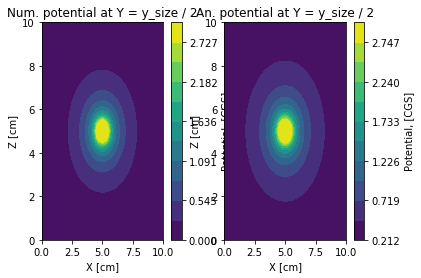

In [13]:
plt.figure()
plt.subplot(121)
X = anum[:, 0].reshape( ( 101,101 ) ) # 41 node with varying X and fixed Z, then next X-row with different Z. 
Y = anum[:, 2].reshape( ( 101,101 ) )
Z = anum[:, 3].reshape( ( 101,101 ) )
levels = np.linspace( Z.min(), Z.max(), 12 )
CS = plt.contourf( X, Y, Z, levels )
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('Potential, [CGS]')
plt.xlabel( "X [cm]" )
plt.ylabel( "Z [cm]" )
plt.title('Num. potential at Y = y_size / 2')
# an
plt.subplot(122)
Z = anum[:, 4].reshape( ( 101,101 ) )
levels = np.linspace( Z.min(), Z.max(), 12 )
CS = plt.contourf( X, Y, Z, levels )
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('Potential, [CGS]')
plt.xlabel( "X [cm]" )
plt.ylabel( "Z [cm]" )
plt.title('An. potential at Y = y_size / 2')
#plt.show()    
print( "Saving potential comparison to 'potential_in_plane.png'")
plt.savefig('potential_in_plane.png')


In [14]:
along_z = np.array([(x, y, z, p) for ( x, y, z, p ) in zip( node_x, node_y, node_z, phi) if 
                    x == sphere_center_x and y == sphere_center_y ])

bnum = np.concatenate((along_z, spherical_potential(along_z[:, :-1],
                                                    np.array([sphere_center_x, sphere_center_y, sphere_center_z]), 
                                                    sphere_radius, sphere_phi)[:, np.newaxis]), axis=-1)
bnum.shape


/home/fizmat/miniconda3/envs/ef_python/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(101, 5)

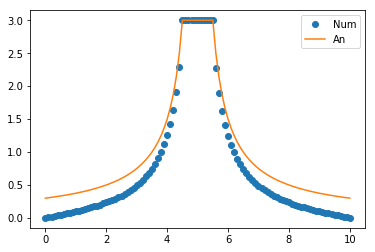

In [15]:
plt.figure()
plt.plot(bnum[:, 2], bnum[:, 3], 
          linestyle='', marker='o',
          label = "Num" )
plt.plot(bnum[:, 2], bnum[:, 4],
          label = "An" )
plt.legend()